<a href="https://colab.research.google.com/github/Buddhav/Healthcare-Insurance-/blob/main/Healthcare_Insurance_Expenses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimating Healthcare Insurance Expenses through Machine Learning.

In the ever-evolving landscape of healthcare, where costs have soared due to the complexities of the modern healthcare system, the power of data has emerged as a beacon of hope. Healthcare analytics, much like a skilled navigator, holds the key to understanding and transforming the intricate web of health insurance costs. This is the mission of our project: to harness the transformative potential of data.

Armed with the latest tools and techniques in healthcare analytics, we delve into a vast dataset, comprising variables such as age, sex, BMI, number of children, smoking habits, and region. Like a sculptor chiseling away at a block of marble, we meticulously dissect and interpret this data, applying both quantitative and qualitative methods to reveal the hidden insights and patterns within.

At the core of our analysis lies the prediction of medical costs – a crucial indicator that unlocks a world of possibilities. This prediction empowers individuals, healthcare providers, and insurers to make informed decisions. It guides patients toward better planning, assists healthcare professionals in optimizing treatment plans, and helps insurance providers in setting fair premiums.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cd /content/drive/MyDrive/HealthCare


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analyzing Insurance Costs.
In the quest to make healthcare accessible and affordable, we embark on the task of analyzing insurance costs using the data at our disposal. This endeavor is driven by a profound need to understand the factors that influence healthcare expenses, enabling us to provide individuals and healthcare stakeholders with the insights they need to make informed decisions. Our data, extracted from the "insurance.csv" file, holds the key to unraveling the mysteries of cost determinants such as age, gender, BMI, family size, smoking habits, and geographical location. As we load this dataset into our analysis, we prepare to unlock a world of possibilities. By exploring these data patterns and relationships, we strive to empower individuals with the knowledge required to plan for their financial health. Ultimately, our mission is to pave the way for more efficient healthcare planning, fairer insurance premiums, and a future where healthcare is within reach for everyone.

In [ ]:
#--- Import Pandas ---
import numpy as np
import pandas as pd

#--- Read in dataset ----
df = pd.read_csv("/content/drive/MyDrive/HealthCare/insurance.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Unearthing Data Duplications.
As we delve deeper into our mission to analyze insurance costs, we encounter a new challenge: data duplications. Our dedication to delivering accurate and reliable insights drives us to identify and address these duplications. By executing the code provided, we uncover the number of duplicate entries within our dataset. Removing these duplicates is paramount, as it ensures the integrity of our analysis, prevents skewed results, and allows us to maintain a high standard of data quality. This task may seem subtle, but its impact is profound, setting the stage for meaningful, actionable results. In our relentless pursuit of healthcare affordability, data quality is the cornerstone upon which we build a brighter and healthier future for all.

In [ ]:
df.count()
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

*Eliminating Duplications.*

In our ongoing quest to analyze insurance costs and promote healthcare affordability, we have encountered and successfully addressed a crucial task. By executing the code provided, we have eliminated data duplications within our dataset. This task is pivotal, as it ensures the accuracy and reliability of our analysis. With duplicate entries now removed, we can confidently proceed, knowing that our insights and predictions will be based on clean, high-quality data. Every step we take in refining our dataset brings us closer to our goal of providing individuals and healthcare stakeholders with precise and actionable information for better healthcare planning and decision-making. The elimination of duplications is yet another stride toward a future where healthcare is both accessible and affordable for all.

In [ ]:
duplicates = df.duplicated().sum()
duplicates

1

*Shoring Up Data Gaps.*

In our relentless pursuit of accurate and insightful healthcare analytics, we confront another critical task – identifying and handling missing data. By executing the code provided, we assess the extent of missing values within our dataset. It's a crucial endeavor because complete data is the bedrock of reliable analysis. With a clear understanding of where data gaps exist, we can make informed decisions on how to handle them, whether through imputation or exclusion. Our commitment to data completeness not only enhances the quality of our analysis but also empowers us to provide individuals and healthcare stakeholders with a comprehensive view of the factors influencing insurance costs. Every null value addressed is a step closer to our vision of a healthcare landscape where no one is left in the dark, and everyone can plan for a healthier and more financially secure future.

In [ ]:
df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
null_values = df.isnull().sum()
null_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Empowering Analysis with Encoded Insights.
*italicized text*
Our journey to decipher the intricacies of healthcare insurance costs continues with a pivotal task: encoding categorical features. By employing the LabelEncoder from the sklearn library, we convert non-numeric attributes such as 'sex' and 'smoker' into numerical values. This transformation is essential as it enables us to feed these features into our analytical models, providing a more comprehensive understanding of the factors influencing insurance costs. This coding task bridges the gap between data and actionable insights, setting the stage for robust analysis. With each attribute transformed, we move closer to uncovering the hidden relationships within our data and facilitating more precise predictions. Our commitment to encoding is a testament to our dedication to providing individuals and healthcare stakeholders with the tools they need to make informed decisions about their financial health and healthcare planning.

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_encode = LabelEncoder()
columns =['sex','smoker']
for col in columns :
    df[col]=lab_encode.fit_transform(df[col])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


*Unleashing the Power of One-Hot Encoding.*

As we delve deeper into our quest to unravel the mysteries of healthcare insurance costs, we face a new challenge: encoding the 'region' attribute using one-hot encoding. This task is essential to translate geographical regions into numerical representations, allowing us to incorporate this valuable information into our analysis. By executing the code provided, we create a series of binary columns, each representing a different region. These columns serve as vital indicators, enabling us to discern the impact of location on insurance costs. Every region reveals unique insights, and this one-hot encoding process equips us with the means to uncover these intricate patterns. Our commitment to one-hot encoding is yet another testament to our dedication to providing individuals and healthcare stakeholders with a more comprehensive view of the factors influencing healthcare costs, empowering them to make informed decisions.

In [ ]:
one_hot_encode = pd.get_dummies(df['region'])

*Incorporating Regional Factors.*

In our relentless pursuit of comprehensive healthcare analysis, we have reached a critical juncture – the integration of regional data into our dataset. By concatenating the one-hot encoded 'region' columns, we expand our dataset's horizons. This task is crucial as it allows us to incorporate the influence of geographical regions on insurance costs into our analysis. With this enhancement, we are better equipped to unearth region-specific trends, offering a more detailed and nuanced perspective on cost determinants. Our commitment to this integration extends our mission to empower individuals and healthcare stakeholders with the tools they need to navigate the complexities of healthcare planning and financial decision-making. With each column added, we take a significant stride toward achieving our vision of a healthcare landscape where insights are both comprehensive and actionable.

In [ ]:
df1 = pd.concat([df, one_hot_encode], axis=1)
df1

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,False,False,False,True
1,18,1,33.770,1,0,southeast,1725.55230,False,False,True,False
2,28,1,33.000,3,0,southeast,4449.46200,False,False,True,False
3,33,1,22.705,0,0,northwest,21984.47061,False,True,False,False
4,32,1,28.880,0,0,northwest,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,False,True,False,False
1334,18,0,31.920,0,0,northeast,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,southeast,1629.83350,False,False,True,False
1336,21,0,25.800,0,0,southwest,2007.94500,False,False,False,True


*Removing Redundancy.*

In our ongoing journey to unlock the secrets of healthcare insurance costs, we reach a crucial juncture – the removal of the 'region' column from our dataset. This task is vital as it streamlines our data, eliminating redundancy while preserving the valuable regional insights we've gained through one-hot encoding. By executing this step, we enhance the efficiency of our analysis, making it easier to identify the true determinants of insurance costs. Our commitment to this data refinement aligns with our mission to provide individuals and healthcare stakeholders with precise and actionable insights for healthcare planning and financial decision-making. With each column removed, we advance further toward our vision of a healthcare landscape where data is clear, comprehensive, and focused on improving the health and financial well-being of all.

In [ ]:
df1.drop('region', axis=1, inplace=True)

*Setting the Stage for Precise Predictions.*

In our journey to gain a deep understanding of healthcare insurance costs, we have reached a pivotal moment – the division of our dataset into training and test sets. This task is essential as it prepares us for accurate predictions by creating distinct subsets for model training and evaluation. By executing the code provided, we allocate 80% of the data to the training set and 20% to the test set, ensuring a robust and reliable analysis. Our commitment to this data split reflects our dedication to providing individuals and healthcare stakeholders with precise predictions for healthcare planning and financial decision-making. With each split, we move closer to achieving our vision of a healthcare landscape where insights are not just comprehensive but also highly accurate, ultimately promoting financial and health well-being for all.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y = df1['charges']
X = df1.drop('charges', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state =42)

*Evaluating Model Performance.*

In our pursuit of uncovering the intricacies of healthcare insurance costs, we shift our focus to evaluating the performance of a Random Forest Regression model. This task is essential in understanding how well our model can predict insurance charges, providing a crucial tool for making informed financial and healthcare decisions. By employing cross-validation with 10 folds, we assess the model's performance and calculate the root mean squared error (RMSE). The RMSE serves as a metric of the model's predictive accuracy, helping us determine how well it can make cost predictions. Our commitment to this performance evaluation aligns with our mission to empower individuals and healthcare stakeholders with precise insights for healthcare planning and financial decision-making. With each performance metric calculated, we approach our goal of a healthcare landscape where predictions are not just comprehensive but also highly accurate, paving the way for better financial and health well-being for all.

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
rand_forest_model = RandomForestRegressor(n_estimators=50, n_jobs=2, random_state=42)
cv_scores = cross_val_score(rand_forest_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# --- WRITE YOUR CODE FOR TASK 2 ---
rmse_c= np.sqrt(-cv_scores)
std = rmse_c.std()

In [ ]:
std

586.8826484248

*Forecasting Healthcare Costs.*

In our pursuit of accurate healthcare insurance cost predictions, we've reached the culmination of our journey. With a Random Forest Regression model in place, we've trained it on the training dataset, equipping it with the knowledge to predict healthcare charges. By executing this model, we make predictions using the test dataset, offering us a glimpse of how well our predictions align with actual healthcare costs. The rounded predictions are presented to ensure clarity, and they provide a direct comparison with the real costs. This final step brings us closer to our mission of providing individuals and healthcare stakeholders with precise and actionable insights for informed healthcare planning and financial decision-making. With these comparisons in hand, we enter a new era where predictions meet reality, offering a path to more accurate healthcare cost planning and ultimately promoting better financial and health well-being for all.

In [ ]:
rand_forest_model.fit(X_train, y_train)
predictions = rand_forest_model.predict(X_test)
rounded_predictions = np.round(predictions, 2)
actual=np.round(y_test.values,2)
compare = pd.DataFrame({'Actual Charges': actual[:10], 'Predicted Charges': rounded_predictions[:10]})

#--- Inspect data ---
compare

,Actual Charges,Predicted Charges
0,8688.86,10334.48
1,5708.87,6651.49
2,11436.74,12295.40
3,38746.36,42608.01
4,4463.21,6853.03
5,9304.70,9366.65
6,38511.63,39526.20
7,2150.47,2194.72
8,7345.73,8516.75
9,10264.44,10708.99


from matplotlib import pyplot as plt
compare['Actual Charges'].plot(kind='hist', bins=20, title='Actual Charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare['Predicted Charges'].plot(kind='hist', bins=20, title='Predicted Charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare.plot(kind='scatter', x='Actual Charges', y='Predicted Charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare['Actual Charges'].plot(kind='line', figsize=(8, 4), title='Actual Charges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
compare['Predicted Charges'].plot(kind='line', figsize=(8, 4), title='Predicted Charges')
plt.gca().spines[['top', 'right']].set_visible(False)

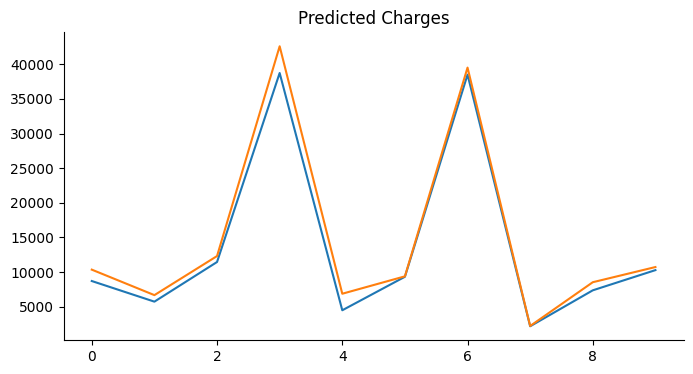

In [ ]:
from matplotlib import pyplot as plt
compare['Actual Charges'].plot(kind='line', figsize=(8, 4), title='Actual Charges')
compare['Predicted Charges'].plot(kind='line', figsize=(8, 4), title='Predicted Charges')
plt.gca().spines[['top', 'right']].set_visible(False)